# Cargando librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Función para Ecuación Normal

## $$\hat\theta = (X^TX)^{-1}X^Ty$$

In [35]:
def normal_equation(X, Y, percent):
    '''Esta función sirve para utilizar el método de regresión lineal con ecuación normal
    normal_equation(X, Y): 
    X: Matriz columna de inputs 
    Y: Matriz columna de outputs
    percent: % de datos que seran utilizados para el test (base 100)
    
    Return: indices_test, indices_train, theta, Y_predict
    
    indices_test: indices de los valores utilizados para el test
    indices_train: indices de los valores utilizados para el entrenamiento
    theta: valores correspondientes a theta_n
    Y_predict: valores de Y obtenidos de la predicción
    '''
    import numpy as np
    import pandas as pd
    import random as random
    
    m = len(X)
    indices_test = list(pd.Series(random.sample(list(np.arange(0, m)), round(m * percent / 100))).sort_values())
    indices_train = list(np.arange(0, m))
    
    for indice in indices_test:
        indices_train.remove(indice)

    X_train = np.c_[X.iloc[indices_train]]
    X_test = np.c_[X.iloc[indices_test]]
    Y_train = np.c_[Y.iloc[indices_train]]
    Y_test = np.c_[Y.iloc[indices_test]]
    
    # Entrenamiento
    m = len(X_train)
    
    X_b = np.c_[np.ones((m, 1)), X_train]
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y_train
    
    # test
    
    m = len(X_test)
    
    X_b_test = np.c_[np.ones((m, 1)), X_test]
    Y_predict = X_b_test @ theta
    
    return indices_test, indices_train, theta, Y_predict, Y_test

m = 100
X = 2 * np.random.rand(m, 1)
y = 3 + 4*X + 1.5*np.random.randn(m, 1)
indices_test, indices_train, theta, Y_predict = normal_equation2(X, y, 25)

plt.plot(Y_predict)
plt.plot(y[indices_test])

# Análisis de los datos -A-

In [3]:
df = pd.read_csv('datos/insurance.csv')

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


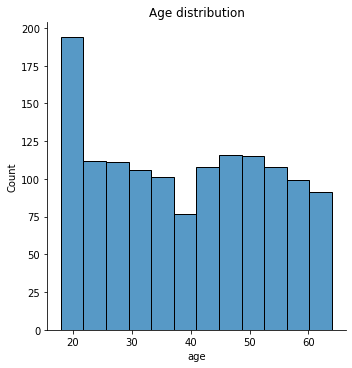

In [7]:
sns.displot(df['age'], kind='hist')
plt.title('Age distribution')
plt.show()

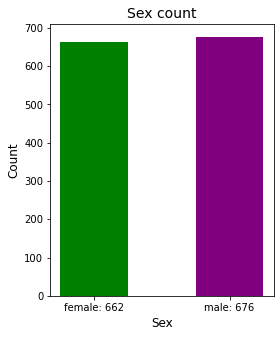

In [8]:
female, male = df.groupby('sex')['sex'].count()
plt.figure(figsize=(4, 5))
plt.bar(['female', 'male'], [female, male], color=['green', 'purple'], width=0.5, tick_label=[f'female: {female}', f'male: {male}'])
plt.title('Sex count', size=14)
plt.ylabel('Count', size=12)
plt.xlabel('Sex', size=12)
plt.show()

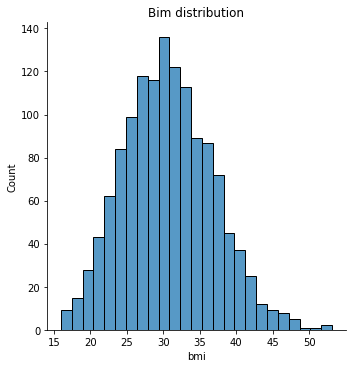

In [9]:
sns.displot(df['bmi'])
plt.title('Bim distribution')
plt.show()

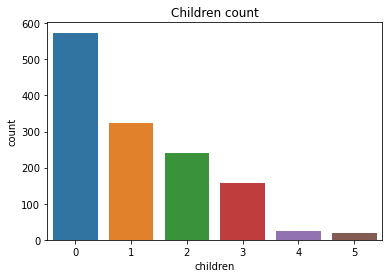

In [10]:
sns.countplot(x=df['children'])
plt.title('Children count')
plt.show()

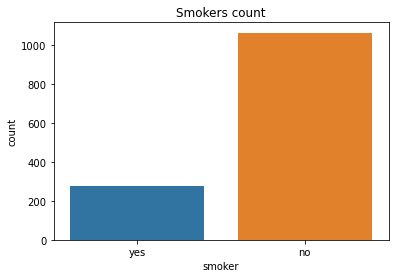

In [11]:
sns.countplot(x=df['smoker'])
plt.title('Smokers count')
plt.show()

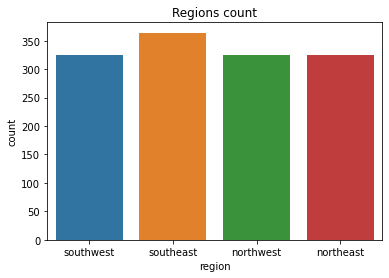

In [12]:
sns.countplot(x=df['region'])
plt.title('Regions count')
plt.show()

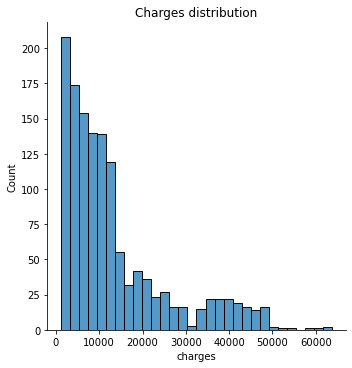

In [13]:
sns.displot(df['charges'])
plt.title('Charges distribution')
plt.show()

In [14]:
genero = pd.get_dummies(df['sex'])
fumadores = pd.get_dummies(df['smoker'])
region = pd.get_dummies(df['region'])
df = pd.concat([df, genero['male'], fumadores['yes'], region], axis=1)
df = df.drop(['sex', 'smoker', 'region'], axis=1)
df = df.rename(columns={'male':'sex', 'yes':'smoker'})

sns.pairplot(df)
plt.show()

In [15]:
df.corr()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


Los que tienen más peso son age, bmi, age

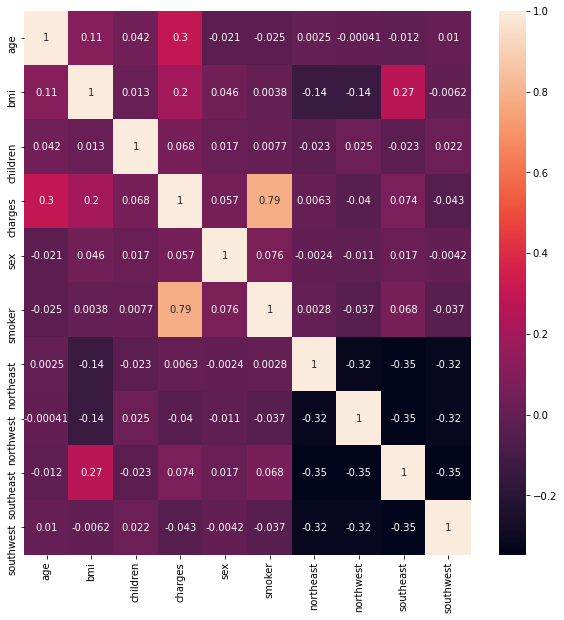

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [17]:
X = df[['age', 'bmi', 'smoker']]
Y = df[['charges']]

In [18]:
X

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [19]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [23]:
indices_test, indices_train, theta, Y_predict, Y_test = normal_equation(X, Y, 25)

In [ ]:
print(f'Numero de datos utilizados para el test: {len(indices_test)}')
print(f'Numero de datos utilizados para el entrenamiento: {len(indices_train)}')

In [25]:
Y_predict

,charges
0,3969.305526
1,6238.935921
2,3988.363541
3,10948.056475
4,11897.537234
...,...
329,9258.119703
330,7500.992828
331,11049.491509
332,1974.943104


In [24]:
Y_test

,charges
1,1725.55230
2,4449.46200
3,21984.47061
6,8240.58960
9,28923.13692
...,...
1309,6875.96100
1310,6940.90985
1327,9377.90470
1328,22395.74424


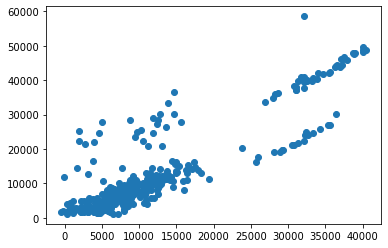

In [26]:
plt.scatter(Y_predict, Y.iloc[indices_test])
plt.show()

In [27]:
theta

,charges
0,-12125.785558
1,253.267262
2,341.613277
3,23361.807080


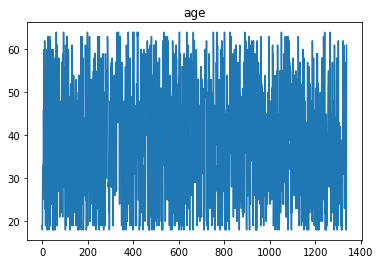

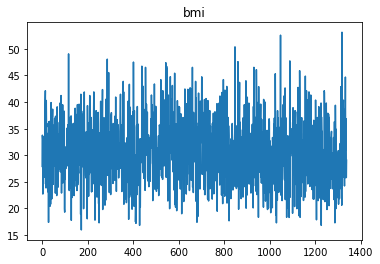

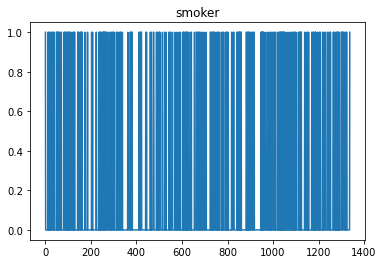

In [33]:
for elemento in X:
    plt.plot(X[elemento])
    plt.title(f'{elemento}')
    plt.show()